In [32]:
from konlpy.tag import Komoran

komoran=Komoran()

import pandas as pd
import os
import numpy as np
def MED_POS_tag(x):
    MED=pd.read_csv('/home/u1013/schtm_osy_lsm_kjh/Crawling_Dataset/{0}'.format(x),encoding='utf-8')
    MED=MED.drop('Unnamed: 0',axis=1)
    MED_text=np.array(MED.loc[:,'Text'].tolist())
    MED_pos_words=[]
    for i in range(len(MED)):
        MED_pos_words.append(komoran.pos(MED_text[i]))
    total_text=[]
    pos_text=[]
    keyword=['의료정책']
    for j in range(len(MED)):
        text_list=MED_pos_words[j]
        for i in range(len(text_list)):
            if text_list[i][1] not in ('SF','SP','SS','SE','SO','SW') and text_list[i][0] not in keyword:
                pos_text.append(text_list[i][:])
        total_text.append(pos_text)
        pos_text=[]
    sub_pos=[]
    selected_pos=[]
    for j in range(len(total_text)):
        pos_list=total_text[j]
        for i in range(len(pos_list)):
            if pos_list[i][1] in ('NNG','NNP','MM','MAG'):
                sub_pos.append(pos_list[i][0])
    return sub_pos

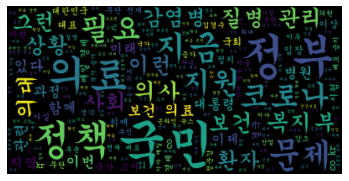

In [22]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = './gungsuh.ttf'

noun_text=''
for i in tag:
    noun_text=noun_text+' '+i
wordcloud=WordCloud(max_font_size=60,relative_scaling=.5,font_path=FONT_PATH).generate(noun_text)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
tag=MED_POS_tag('한국경제TV_의료정책.csv')

In [40]:
import pickle

with open('한국경제TV_의료정책.txt','wb') as f:
    pickle.dump(tag,f)

In [41]:
with open('한국경제TV_의료정책.txt','rb') as f:
    read=pickle.load(f)
    print(read)

['한정애', '더불어민주당', '신임', '정책위', '의장', '오전', '국회', '원내', '대책', '회의', '발언', '사진', '연합뉴스', '국회', '보건', '복지', '위원장', '한정애', '더불어민주당', '의원', '사진', '공공', '의대', '설립', '의사', '정원', '확충', '의료', '계가', '반발', '정부', '의료', '정책', '관련', '당의', '이름', '강행', '처리', '논의', '체', '충분히', '협의', '안', '법제', '화해', '처리', '한정애', '의원', '이날', 'KBS 라디오', '김경래', '최강', '시사', '인터뷰', '의대', '정원', '방법', '말', '한정애', '의원', '이제', '주장', '논의', '토론', '때', '국회', '그', '장', '정부', '의료', '정책', '원점', '논의', '합의문', '명문', '요구', '관련', '기사', '이낙연', '김종인', '대권', '도전', '바람결', '있다', '히포크라테스 선서', '언급', '뿔', '의료', '취임 선서', '홍', '남', '겨냥', '박근혜', '사람', '커밍아웃', '인사', '홍', '남', '철', '비판', '철', '노력', '이재명', '의료진', '북한', '강제', '파견', '품격', '시무', '조', '논쟁', '여의도', '브리핑', '이재명', '홍', '남', '인터뷰', '확인', '안', '비난', '당황', '의사', '국가시험', '연기', '이인영', '난시', '의료인', '파견', '기본', '불의', '제자', '복지부', '의대', '교수', '종합', '최고', '위원', '청년', '배려', '이낙연', '파격', '인선', '이어', '원점', '재검토', '단어', '정부', '국회', '굴복', '의미', '모든', '정책', '진행', '때', '소통', '조금', '부족', '다', '원점', '철회', '방식'